## 作業
畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

In [1]:
import os
import keras

import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt

train, test = keras.datasets.cifar10.load_data()

Using TensorFlow backend.


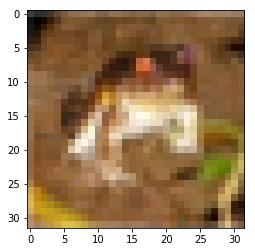

In [2]:
image = train[0][0] # 讀取圖片

plt.imshow(image)
plt.show()

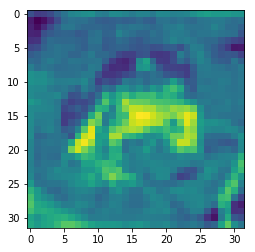

In [3]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

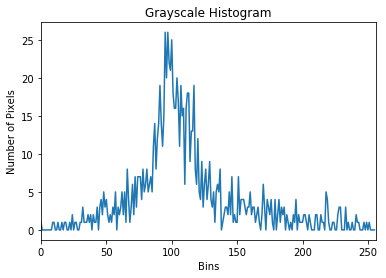

In [4]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [5]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:\n", hist[:2]) 
# 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1

hist shape: (256, 1) 
直方圖中前兩個值:
 [[1.]
 [0.]]


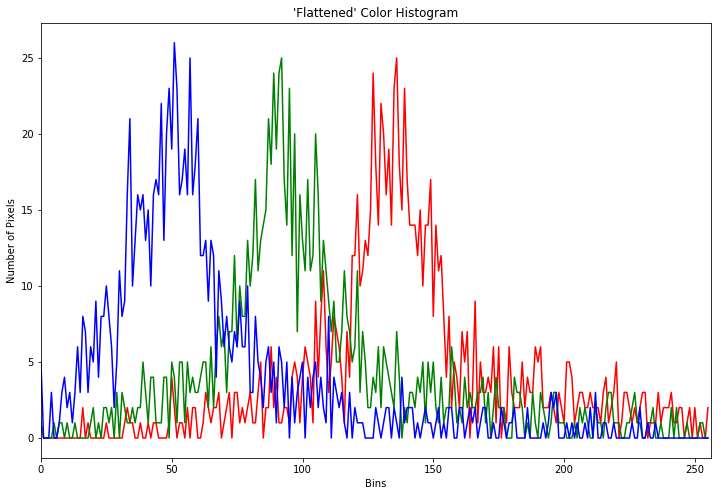

In [67]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
# chans 將 圖片切成 3個 [32,32]的 list型態，每格代表不同的灰階色域 value
colors = ("r", "g", "b")
plt.figure(figsize=(12, 8))
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
 
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()

In [59]:
import numpy as np
import pandas as pd

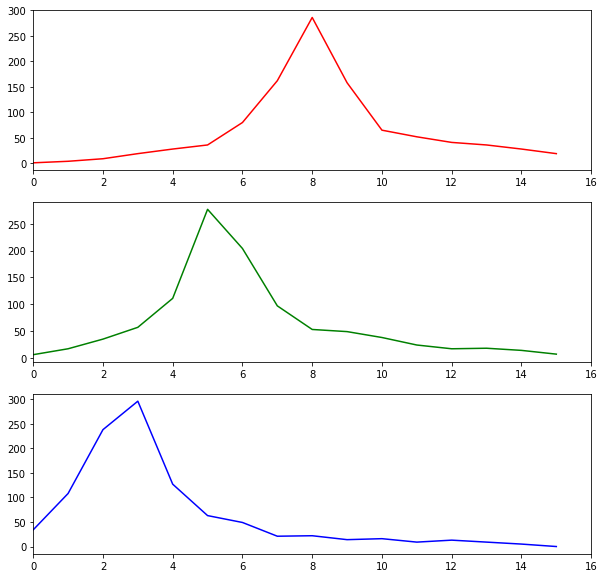

In [103]:
chans = cv2.split(image) 
fig = plt.figure(figsize=(10,10))
colors = ("r", "g", "b")
color_class = {}

# Color Red Process
hist_r = cv2.calcHist([chans[0]], [0], None, [16], [0, 256])
color_class['r'] = hist_r
plt.subplot(3,1,1)
plt.plot( hist_r, color = 'r')
plt.xlim([0, 16])

hist_g = cv2.calcHist([chans[1]], [0], None, [16], [0, 256])
color_class['g'] = hist_g
plt.subplot(3,1,2)
plt.plot( hist_g, color = 'g')
plt.xlim([0, 16])

hist_b = cv2.calcHist([chans[2]], [0], None, [16], [0, 256])
color_class['b'] = hist_b
plt.subplot(3,1,3)
plt.plot( hist_b, color = 'b')
plt.xlim([0, 16])

plt.show()

In [119]:
bins = np.linspace(16,256,16)
df_temp = pd.DataFrame( index=bins , columns=colors )

for c in colors:
    df_temp[c] = color_class[c]

df_temp.T

,16.0,32.0,48.0,64.0,80.0,96.0,112.0,128.0,144.0,160.0,176.0,192.0,208.0,224.0,240.0,256.0
r,1.0,4.0,9.0,19.0,28.0,36.0,80.0,162.0,286.0,158.0,65.0,52.0,41.0,36.0,28.0,19.0
g,6.0,17.0,35.0,57.0,111.0,277.0,204.0,97.0,53.0,49.0,38.0,24.0,17.0,18.0,14.0,7.0
b,34.0,108.0,238.0,296.0,127.0,63.0,49.0,21.0,22.0,14.0,16.0,9.0,13.0,9.0,5.0,0.0
